In [77]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [78]:
dnames=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']
bname='progeny'
atype='_abs'

In [79]:
scores={}
for dname1 in dnames:
    scores[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,'_filtered',dname2,'_filtered',atype),
                                     sep=',',header=0,index_col=0).abs().max(1)
        scores[dname1]+=list(score_1minus2.values)
scores_df=pd.DataFrame(columns=['Data','Delta'])
for dname in scores:
    temp=pd.DataFrame(columns=scores_df.columns)
    temp['Delta']=scores[dname]
    temp['Data']=dname
    scores_df=pd.concat([scores_df,temp])
scores_df['Random']=False
scores_random={}
for dname1 in dnames:
    scores_random[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,'_random_uniform_0',dname2,'_random_uniform_0',atype),
                                     sep=',',header=0,index_col=0).abs().max(1)
        scores_random[dname1]+=list(score_1minus2.values)
scores_random_df=pd.DataFrame(columns=['Data','Delta'])
for dname in scores_random:
    temp=pd.DataFrame(columns=scores_random_df.columns)
    temp['Delta']=scores_random[dname]
    temp['Data']=dname
    scores_random_df=pd.concat([scores_random_df,temp])
scores_random_df['Random']=True

scores=pd.concat([scores_df, scores_random_df])

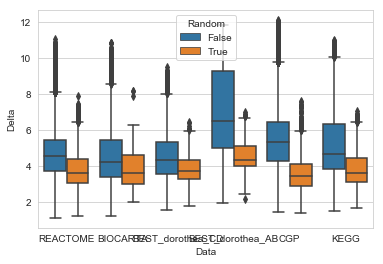

In [80]:
sns.boxplot(scores['Data'],scores['Delta'], hue=scores['Random'])

In [93]:
dnames=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']
bname='progeny'
atype='_abs'

In [94]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,'_filtered',atype),
                      sep=',',header=0,index_col=0).abs().max(1)
        score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,'_filtered',dname1,'_filtered',atype),
                                     sep=',',header=0,index_col=0).abs().max(1)
        if dname2<dname1:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_2minus1.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
delta_df['Random']=False    
delta_random={}
for dname1 in dnames:
    delta_random[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,'_random_uniform_0',atype),
                      sep=',',header=0,index_col=0).abs().max(1)
        score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,'_random_uniform_0',dname1,'_random_uniform_0',atype),
                                     sep=',',header=0,index_col=0).abs().max(1)
        if dname2<dname1:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[1]).values]
        delta_random[dname1]+=list(score_2minus1.values-score.values)
delta_random_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta_random:
    temp=pd.DataFrame(columns=delta_random_df.columns)
    temp['Delta']=delta_random[dname]
    temp['Data']=dname
    delta_random_df=pd.concat([delta_random_df,temp])
delta_random_df['Random']=True
delta = pd.concat([delta_df,delta_random_df])

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


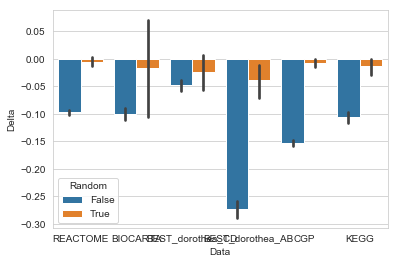

In [95]:
sns.barplot(delta['Data'],delta['Delta'],hue=delta['Random'])

In [92]:
sns.color_palette('GnBu',2)[1][2]*256

204.79999999999998

In [99]:
temp=pd.read_csv('../results/benchmark/z_scores/gdsc/single/KEGG_filtered_abs.csv',sep=',',header=0,index_col=0)

In [100]:
temp['TP53_mut'].sort_values()

KEGG_ECM_RECEPTOR_INTERACTION                                     -3.489207
KEGG_TYPE_I_DIABETES_MELLITUS                                     -3.448693
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS                                 -3.381913
KEGG_ASTHMA                                                       -3.261263
KEGG_HEMATOPOIETIC_CELL_LINEAGE                                   -3.110784
KEGG_P53_SIGNALING_PATHWAY                                        -3.028422
KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION                 -2.796916
KEGG_CELL_ADHESION_MOLECULES_CAMS                                 -2.776882
KEGG_LYSOSOME                                                     -2.747498
KEGG_FOCAL_ADHESION                                               -2.723457
KEGG_GRAFT_VERSUS_HOST_DISEASE                                    -2.621506
KEGG_ABC_TRANSPORTERS                                             -2.502191
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE               -2.453219
KEGG_ALLOGRA